# Setup

In [31]:
%matplotlib inline
from pylab import *
import math
from matplotlib import pyplot as plt
import numpy as np

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties_energyset as decay
reload(decay)

import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.py'>

In [35]:
# Generating data for plots
h = 37 #km
R = 6356. # km
ice =2
N = 2000000 # number of samples
E_nu = 19 #log energy in eV of incident neutrino 
E_cut = 15
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1
theta_view = radians(1.5)
    
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot

event_decay_alt=[]
event_efield=[]
event_view=[]
event_emg=[]
for j in range(0,steps):
    print j
    theta_src = radians(start+(end-start)*float(j)/steps)
    #print start+(end-start)*float(j)/steps
    
    #print np.degrees(theta_src), h,R,theta_view, N
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    #print A_deg, np.degrees(np.average(emg_angle))
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, emg_angle, view_angle, A_deg, A0, N0)

    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()
    
    if len(ret_e_dot) != 0:
        trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, A0,N0)
        decay_alt, Peak_Efield, view_angle, emg_angle = trigger_result.RF_efield_PLOT()
        for i in range(len(decay_alt)):
            event_decay_alt.append(decay_alt[i])
            event_efield.append(Peak_Efield[i])
            event_view.append(view_angle[i])
            event_emg.append(emg_angle[i])
    print "   "
    

0
887775 887775 887775
   
1
425115 425115 425115
   
2
251887 251887 251887
   
3
178560 178560 178560
   
4
137406 137406 137406
   
5
111650 111650 111650
   
6
94192 94192 94192
   
7
81498 81498 81498
   
8
71620 71620 71620
   
9
64059 64059 64059
   
10
57789 57789 57789
   
11
52385 52385 52385
   
12
48559 48559 48559
   
13
45300 45300 45300
   
14
41442 41442 41442
   
15
39044 39044 39044
   
16
36843 36843 36843
   
17
34717 34717 34717
   
18
33029 33029 33029
   
19
31416 31416 31416
   
20
29742 29742 29742
   
21
28571 28571 28571
   
22
27161 27161 27161
   
23
25939 25939 25939
   
24
25127 25127 25127
   
25
24219 24219 24219
   
26
23221 23221 23221
   
27
22406 22406 22406
   
28
21663 21663 21663
   
29
20904 20904 20904
   
30
20387 20387 20387
   
31
19719 19719 19719
   
32
19360 19360 19360
   
33
18552 18552 18552
   
34
17989 17989 17989
   
35
17708 17708 17708
   
36
17328 17328 17328
   
37
16764 16764 16764
   
38
16516 16516 16516
   
39
16188 16188 16

In [33]:
print event_decay_alt[:10]
print event_efield[:10]
print event_view[:10]
print event_emg[:10]

[1.0, 7.0, 8.0, 7.0, 7.0, 2.0, 0.0, 6.0, 9.0, 3.0]
[9.750833602572793e-05, 1.6274250245510032e-06, 2.7286683395028854e-06, 7.908503590576306e-05, 2.752057211246437e-06, 1.3616520571026849e-05, 1.1331094638011497e-06, 0.0001629363705040796, 1.480364743056576e-06, 5.301777797828874e-06]
[0.955130384344229, 1.4276909255321972, 1.4241227509218244, 0.5249724684858448, 1.1162665926313189, 1.2027219352098162, 2.485222149145889, 0.5019509356090489, 1.4854729352098923, 1.3719630243458696]
[89.06929342681751, 88.6707424314118, 88.57978786354437, 89.48407211311574, 89.05863324425752, 88.81203875628299, 88.98558618170007, 89.50110024713216, 88.90216258966352, 88.62096520078087]


0
1 573
3 326
5 322
10 732
15 961
20 969
25 1099
30 1125
35 1188
40 1314
3
1 599
3 332
5 345
10 771
15 895
20 1028
25 1051
30 1085
35 1205
40 1317
6
1 577
3 347
5 303
10 724
15 924
20 1049
25 1094
30 1138
35 1250
40 1278
9
1 572
3 363
5 335
10 749
15 893
20 1007
25 985
30 1073
35 1199
40 1378


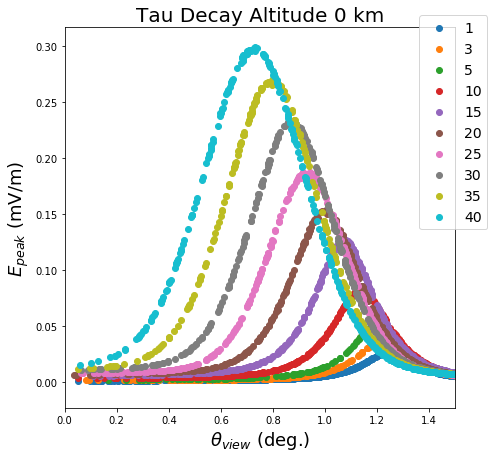

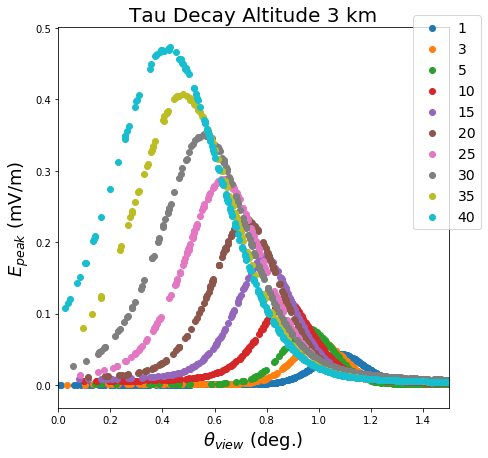

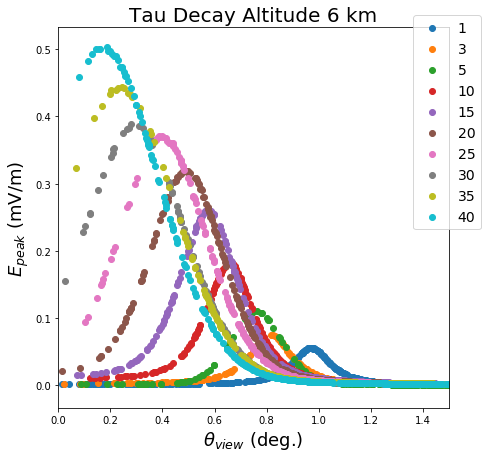

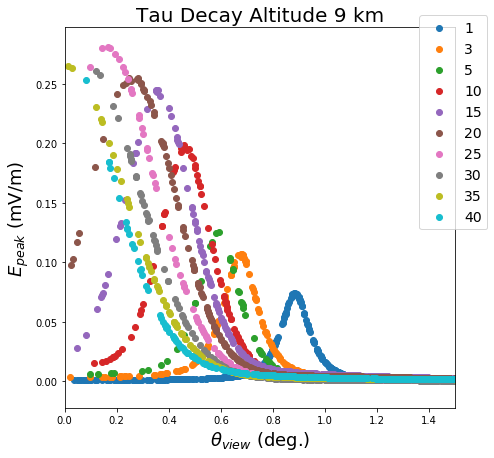

In [36]:
# Input theta view
# Output E_peak
# Diff graph for each decay altitude
# Diff line for each emergence angle


theta_emg = [1,3,5,10,15,20,25,30,35,40]

for i in range(4):
    decay_alt_choice = i*3
    print decay_alt_choice
    event_efield_cut1 =[event_efield[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_view_cut1 =[event_view[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_emg_cut1 = [event_emg[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    for j in range(len(theta_emg)):
        theta_emg_choice =theta_emg[j]
        event_efield_cut2 =[1000*event_efield_cut1[num] for num in range(len(event_emg_cut1)) if round(event_emg_cut1[num]) == theta_emg_choice]
        event_view_cut2 = [event_view_cut1[num] for num in range(len(event_emg_cut1)) if round(event_emg_cut1[num]) == theta_emg_choice]
        print theta_emg[j], len(event_efield_cut2)
        #print event_view_cut2, event_efield_cut2
    
        ax.scatter(event_view_cut2, event_efield_cut2)
    ax.legend([ str(theta_emg[i]) for i in range(len(theta_emg))] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
    plt.xlabel(r'$\theta_{view}$ (deg.)', fontsize=18)
    plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
    plt.title("Tau Decay Altitude "+str(decay_alt_choice)+" km", fontsize=20)
    plt.xlim(0,1.5)
    #plt.ylim(0,.0002)
#     plt.show()
        

0
1
2
3
4
5
6
7
8
9


(0, 40)

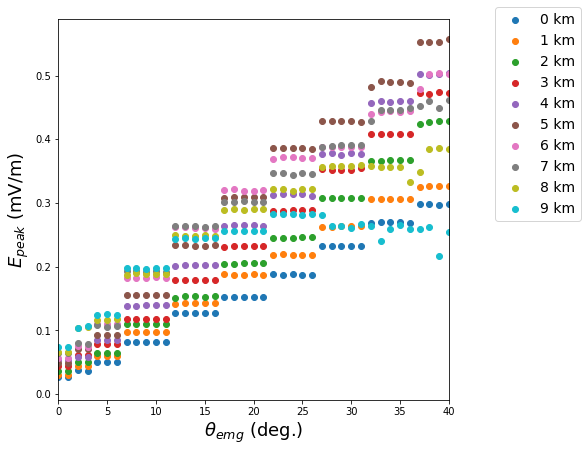

In [46]:
# Input emergence angle
# Output E_peak
# Diff line for each decay altitude


fig = plt.figure(figsize=(7,7))
ax = plt.axes()

for i in range(10):
    decay_alt_choice = i
    print decay_alt_choice
    event_efield_cut1 =[1000*event_efield[num] for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    event_emg_cut1 = [round(event_emg[num]) for num in range(len(event_decay_alt)) if round(event_decay_alt[num]) == decay_alt_choice]
    x = np.linspace(0,40,41)
    max_efield=[]
    for i in x:
        event_efield_max = max([event_efield_cut1[num] for num in range(len(event_emg_cut1)) if event_emg_cut1[num]==i])
        max_efield.append(event_efield_max)

    ax.scatter(x, max_efield)
    
ax.legend([ str(i)+" km" for i in range(10)] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
plt.xlabel(r'$\theta_{emg}$ (deg.)', fontsize=18)
plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
plt.xlim([0,40])

0
1125
1
1033
2
1198
3
1085
4
1122
5
1147
6
1138
7
1159
8
1157
9
1073


(0, 1.5)

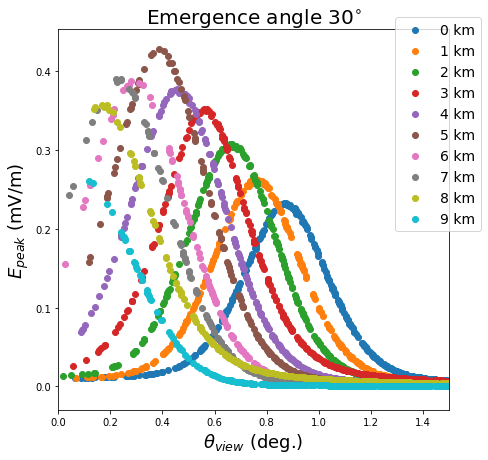

In [48]:
# Emergence angle 30˚
# Input theta_view
# Output E_peak
# Diff graph for each decay altitude

theta_emg_choice = 30

fig = plt.figure(figsize=(7,7))
ax = plt.axes()

for i in range(10):
    decay_alt_choice = i
    print decay_alt_choice
    event_view_cut1 =[event_view[num] for num in range(len(event_emg)) \
                        if (round(event_emg[num]) == theta_emg_choice and round(event_decay_alt[num]) == decay_alt_choice)]
    event_efield_cut1 = [1000*event_efield[num] for num in range(len(event_emg)) \
                        if (round(event_emg[num]) == theta_emg_choice and round(event_decay_alt[num]) == decay_alt_choice)]
    print len(event_view_cut1)
    ax.scatter(event_view_cut1, event_efield_cut1)
    
ax.legend([ str(i)+" km" for i in range(10)] , fontsize=14,bbox_to_anchor=(1.1, 1.05))
plt.xlabel(r'$\theta_{view}$ (deg.)', fontsize=18)
plt.ylabel(r'$E_{peak}$ (mV/m)', fontsize=18)
plt.title("Emergence angle "+r'$30^{\circ}$', fontsize=20)
plt.xlim([0,1.5])
        

## Creation of Graphs with Successive Effective Area Refinement

In [ ]:


# Creating a plot for the full range of possible source declinations 
start = 60 # minimum source declination in degrees
end = 70 # maximum source declination in degrees
steps=10 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_g = []
A_p=[]
A_rf = []
theta_view = radians(1)


for j in range(0,steps):
    
    theta_src = radians(start+(end-start)*float(j)/steps)
    print start+(end-start)*float(j)/steps
    # GEOMETRIC
    geom_area = geom_trap.Area(theta_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, norm, e_dot, A0, N0 = geom_area.event_retention()
    #print A_deg
    
    # DECAY
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, theta_view, exit_angle, view_angle, A_deg, A0, N0)
    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit, A0, N0 = decay1.degree_eff_area()
    #print A_ret
#     print "decay dist", mean(ret_exit_decay)
     print "decay alt", mean(ret_decay_alt)
#     print "energy", mean(ret_tau_energy)
    print "zenith", np.degrees(mean(ret_view)+theta_src)
    print "view", np.degrees(mean(ret_view))
    print "decay view", np.degrees(mean(ret_decay_angle))
    
    # TRIGGER
    trigger_result = RF.event_detection(A_ret, f_lo, f_high, Gain_dB, Nphased, \
                                    ret_exit,ret_view, ret_decay_angle, ret_decay_alt, \
                                    theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                    ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, A0,N0)
    
    A_trigger  = trigger_result.RF_eff_area()
    #print A_trigger
    
    A_g.append(A_deg)
    A_p.append(A_ret)
    A_rf.append(A_trigger)
    print "   "




In [ ]:
# Creating a plot for the full range of possible source declinations 
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps=90 # divisions indeclination used to generate plot
x1 = np.linspace(-end,-start,steps)

A_P_exit_energy = []
theta_view = radians(1)
for j in range(0,steps):
    print j
    theta_src = radians(start+(end-start)*float(j)/steps)
    # GEOMETRIC
    geom_area = geom_trap.Area(theta_src,phi_src, h,R,theta_view, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, norm, e_dot = geom_area.event_retention()
    print A_deg
    
    # DECAY
    decay1 = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, norm,E_nu, h, R, theta_view, exit_angle, view_angle, A_deg)
    A_ret,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_view, ret_decay_alt, ret_decay_angle, ret_fractions,ret_types, ret_p_exit = decay1.degree_eff_area()

    A_P_exit_energy.append(A_ret)


In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(yscale='log')


ax.plot(x1, A_g)
ax.plot(x1, A_p)
ax.plot(x1, A_rf)


# ax.plot(x1, A_g)
# ax.plot(x1, A_P_exit)
# ax.plot(x1, A_P_exit_energy)
# ax.plot(x1, A_P_exit_energy_decay)
# ax.plot(x1, A_rf)
    
#plt.fill_between(x2, sky_maps[0],sky_maps[1],color='tab:gray')
horizon = degrees(np.arcsin(R / (R+h)))-90
plt.xlim(-90,0)  
legend = ax.legend([r'$\langle A \rangle_g$', 
                    #r'$\langle A \rangle_g \cdot P_{exit}$', 
                    #r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14})$', 
                    r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14}) \cdot P_{decay}$',
                   r'$\langle A \rangle_g \cdot P_{exit} \cdot P(E_\tau > 10^{14}) \cdot P_{decay} \cdot P_{trigger} $'],
                   fontsize=14, bbox_to_anchor=(1.1, 1))

plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$[km^2]$', fontsize=18)
plt.title("ANITA Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)

y_min =min(A_g)
y_max = max(A_g)
print y_min, y_max
y_ticks = [10**x for x in range(int(round(math.log10(10**-8))),int(round(math.log10(y_max))))]
plt.yticks(y_ticks)
ax.grid(True,which='both')
#plt.semilogy()
plt.show()

In [ ]:
trigger_result.RF_eff_area()

In [ ]:
data = np.load("anita_generic_parameterization.npz")
for item in data:
    print item
    print data[item]
    